<a href="https://colab.research.google.com/github/Trieu1020/baitapAI1/blob/main/AI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.0 MB/s eta 0:00:00


DiscountPercent: 52.652777777777786


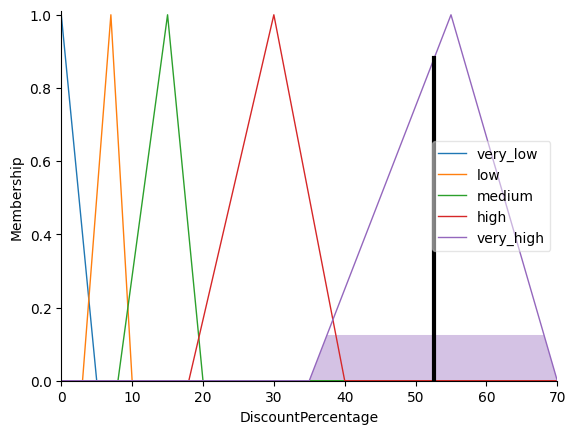

In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


ProductDemand = ctrl.Antecedent(np.arange(0, 101, 1), 'ProductDemand')
CompetitorPricingPressure = ctrl.Antecedent(np.arange(0, 101, 1), 'CompetitorPricingPressure')
StoreReputation = ctrl.Antecedent(np.arange(0, 5.1, 0.1), 'StoreReputation')
ProfitMargin = ctrl.Antecedent(np.arange(0, 101, 1), 'ProfitMargin')
SeasonalDemand = ctrl.Antecedent(np.arange(0, 11, 1), 'SeasonalDemand')

DiscountPercentage = ctrl.Consequent(np.arange(0,71,1),'DiscountPercentage')

ProductDemand['low'] = fuzz.trimf(ProductDemand.universe, [0, 0, 30])
ProductDemand['medium'] = fuzz.trimf(ProductDemand.universe, [20, 50, 70])
ProductDemand['high'] = fuzz.trimf(ProductDemand.universe, [60, 100, 100])

CompetitorPricingPressure['low'] = fuzz.trimf(CompetitorPricingPressure.universe, [0, 0, 30])
CompetitorPricingPressure['medium'] = fuzz.trimf(CompetitorPricingPressure.universe, [20, 50, 70])
CompetitorPricingPressure['high'] = fuzz.trimf(CompetitorPricingPressure.universe, [60, 100, 100])

StoreReputation['low'] = fuzz.trimf(StoreReputation.universe, [0, 0, 4.0])
StoreReputation['medium'] = fuzz.trimf(StoreReputation.universe, [3.8, 4.25, 4.5])
StoreReputation['high'] = fuzz.trimf(StoreReputation.universe, [4.4, 5.0, 5.0])

ProfitMargin['low'] = fuzz.trimf(ProfitMargin.universe, [0, 0, 30])
ProfitMargin['medium'] = fuzz.trimf(ProfitMargin.universe, [20, 50, 70])
ProfitMargin['high'] = fuzz.trimf(ProfitMargin.universe, [60, 100, 100])

SeasonalDemand['none'] = fuzz.trimf(SeasonalDemand.universe, [0, 0, 3])
SeasonalDemand['moderate'] = fuzz.trimf(SeasonalDemand.universe, [2, 5, 7])
SeasonalDemand['high'] = fuzz.trimf(SeasonalDemand.universe, [6, 10, 10])

DiscountPercentage['very_low'] = fuzz.trimf(DiscountPercentage.universe, [0, 0, 5])
DiscountPercentage['low'] = fuzz.trimf(DiscountPercentage.universe, [3, 7, 10])
DiscountPercentage['medium'] = fuzz.trimf(DiscountPercentage.universe, [8, 15, 20])
DiscountPercentage['high'] = fuzz.trimf(DiscountPercentage.universe, [18, 30, 40])
DiscountPercentage['very_high'] = fuzz.trimf(DiscountPercentage.universe, [35, 55, 70])

rules = [
    ctrl.Rule(ProductDemand['high'] & CompetitorPricingPressure['low'] & ProfitMargin['low'],DiscountPercentage['very_low']),
    ctrl.Rule(ProductDemand['low'] & CompetitorPricingPressure['high'] & ProfitMargin['high'],DiscountPercentage['high']),
    ctrl.Rule(StoreReputation['high'] & ProfitMargin['medium'] & SeasonalDemand['high'],DiscountPercentage['medium']),
    ctrl.Rule(CompetitorPricingPressure['high'] & SeasonalDemand['high'] & ProfitMargin['high'],DiscountPercentage['very_high']),
    ctrl.Rule(StoreReputation['low'] & ProductDemand['medium'] & ProfitMargin['low'],DiscountPercentage['medium']),
    ctrl.Rule(ProductDemand['high'] & SeasonalDemand['none'] & CompetitorPricingPressure['low'],DiscountPercentage['very_low']),
    ctrl.Rule(ProfitMargin['high'] & CompetitorPricingPressure['medium'] & SeasonalDemand['moderate'],DiscountPercentage['medium']),
]

control_system = ctrl.ControlSystem(rules)
fuzzy_system = ctrl.ControlSystemSimulation(control_system)

fuzzy_system.input['StoreReputation'] = 4.2
fuzzy_system.input['ProductDemand'] = 90
fuzzy_system.input['ProfitMargin'] = 70
fuzzy_system.input['SeasonalDemand'] = 8
fuzzy_system.input['CompetitorPricingPressure'] = 65

fuzzy_system.compute()

print('DiscountPercent:',fuzzy_system.output['DiscountPercentage'])
DiscountPercentage.view(sim=fuzzy_system)